In [ ]:
import panda as pd
import numphy as np
import matlplotlib.pyplot as plt
import seaborn as snc

In [3]:
import os 
print(os.getcwd)

<built-in function getcwd>


In [4]:
data = pd.read_csv(r'C:\Users\h\Desktop\Kifiya_AI_mastering\notebooks\ass\solar-measurements_benin-malanville_qc.csv', encoding='cp1252')
print(data.head())

NameError: name 'pd' is not defined

In [19]:
data = data.fillna(0)

In [20]:
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numeric_columns)


In [21]:
summary_stats = data.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

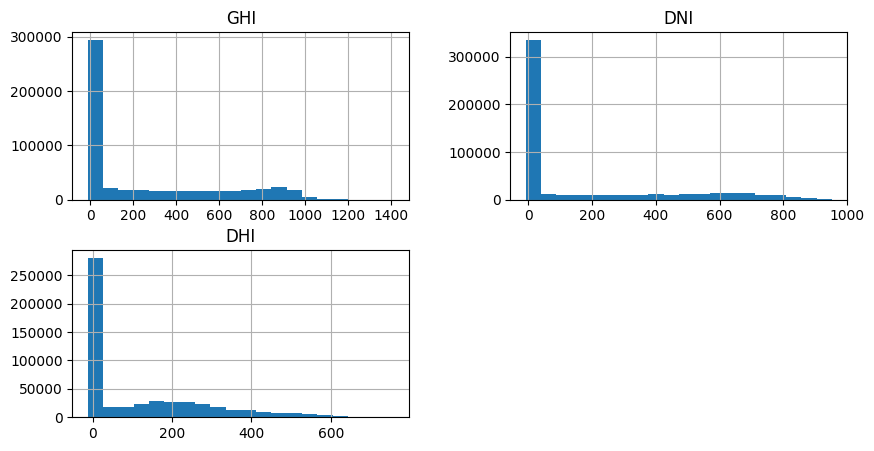

In [22]:
data.hist(column=['GHI', 'DNI', 'DHI'], bins=20, figsize=(10, 5))
plt.show()


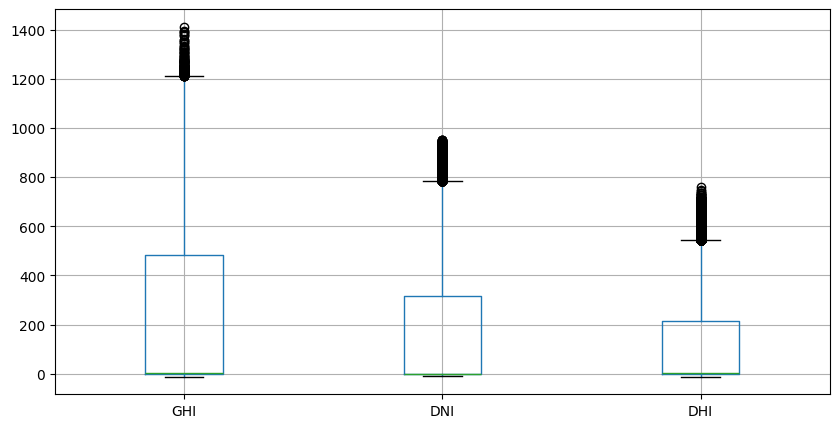

In [23]:
data.boxplot(column=['GHI', 'DNI', 'DHI'], figsize=(10, 5))
plt.show()


In [25]:
data = data.dropna(subset=numeric_columns)

In [26]:
numeric_data = data.select_dtypes(include=[np.number])

In [27]:
correlation_matrix = numeric_data.corr()

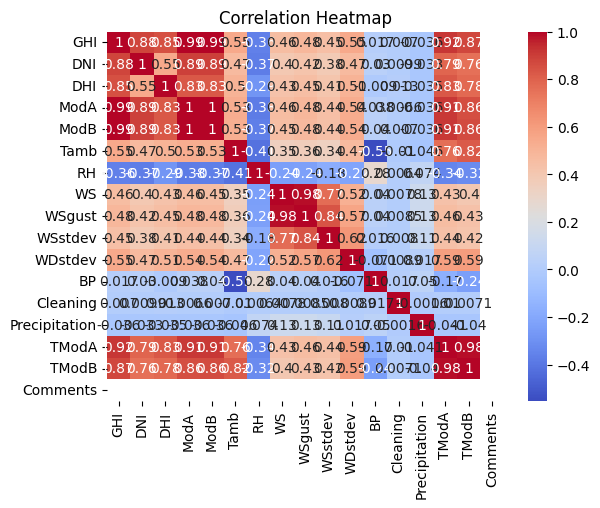

In [29]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap') 
plt.show()

In [33]:
high_potential_areas = data[(data['GHI'] > data['GHI'].mean()) & (data['DNI'] > data['DNI'].mean())]
print(high_potential_areas)


               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
492     2021-08-09 08:12  285.7  232.4  193.8  237.1  239.6  25.6  91.9  1.7   
493     2021-08-09 08:13  318.0  299.3  198.8  265.1  267.9  25.6  92.5  0.9   
494     2021-08-09 08:14  398.5  480.5  205.6  325.4  328.5  25.7  92.4  1.6   
495     2021-08-09 08:15  415.3  500.4  212.4  338.9  342.2  25.8  92.1  1.1   
496     2021-08-09 08:16  371.1  373.2  218.2  306.4  309.8  25.8  91.2  1.2   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
524921  2022-08-08 12:41  793.5  207.1  578.0  746.5  743.6  30.6  72.2  4.2   
525024  2022-08-08 14:24  703.8  170.1  539.1  654.7  646.4  31.7  67.6  3.4   
525026  2022-08-08 14:26  707.2  173.7  539.8  658.0  650.0  31.7  66.6  2.6   
525027  2022-08-08 14:27  708.4  174.5  540.4  658.5  650.3  31.8  65.8  2.0   
525028  2022-08-08 14:28  726.0  193.0  540.7  674.2  666.1  31.9  66.0  1.9   

        WSgust  WSstdev     WD  WDstdev